This Python code snippet is used to extract all files from a ZIP archive to a specified directory.

In [54]:
import zipfile

# Specify the path to your zip file
zip_file_path = '/content/archive.zip'

# Specify the directory where you want to extract the files
extract_dir = '/content/data'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all files
    zip_ref.extractall(extract_dir)

print("Files extracted successfully!")


Files extracted successfully!


This code snippet searches through a directory structure for files ending with -training.parquet and -testing.parquet and stores their file paths in separate lists, dfps_tr and dfps_ts

Two empty lists, dfps_tr and dfps_ts, are created to store the paths to the training and testing .parquet files, respectively. dfps_tr = [] dfps_ts = []

The paths listed refer to Parquet files stored within a directory (/content/data). These files seem to represent different types of network protocols or services (like MSSQL, NetBIOS, SNMP, Syn, etc.), and they are labeled for either training or testing. This suggests they might be data files used in machine learning or data processing, possibly for a project focused on network security, anomaly detection, or network traffic analysis

In [55]:
import os
dfps_tr = []
dfps_ts = []
for dirname, _, filenames in os.walk('/content/data'):
    for filename in filenames:
        if filename.endswith('-training.parquet'):
            dfp = os.path.join(dirname, filename)
            dfps_tr.append(dfp)
            print(dfp)
        elif filename.endswith('-testing.parquet'):
            dfp = os.path.join(dirname, filename)
            dfps_ts.append(dfp)
            print(dfp)

/content/data/UDPLag-training.parquet
/content/data/Syn-testing.parquet
/content/data/NetBIOS-testing.parquet
/content/data/DNS-testing.parquet
/content/data/UDP-testing.parquet
/content/data/NTP-testing.parquet
/content/data/MSSQL-training.parquet
/content/data/Syn-training.parquet
/content/data/LDAP-training.parquet
/content/data/TFTP-testing.parquet
/content/data/UDPLag-testing.parquet
/content/data/Portmap-training.parquet
/content/data/MSSQL-testing.parquet
/content/data/NetBIOS-training.parquet
/content/data/LDAP-testing.parquet
/content/data/SNMP-testing.parquet
/content/data/UDP-training.parquet


This code uses Pandas to read multiple Parquet files, concatenate them into single DataFrames, and then store the results in train_df and test_df.

In [56]:
import pandas as pd
train_df = pd.concat([pd.read_parquet(dfp) for dfp in dfps_tr], ignore_index=True)
test_df = pd.concat([pd.read_parquet(dfp) for dfp in dfps_ts], ignore_index=True)


In [57]:
train_df.to_csv('output.csv', index=False)

In [58]:
train_df.shape, test_df.shape

((125170, 78), (306201, 78))

In [59]:
train_df.head(55)

Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0         17              2                  2                       0   
1          6       40833176                 10                       4   
2          6              1                  2                       0   
3          6            103                  2                       2   
4          6             41                  2                       2   
5          6             53                  2                       2   
6          6             48                  2                       0   
7          6        5359875                  4                       0   
8          6             62                  2                       2   
9          6       64573971                 16                      10   
10         6            119                  2                       2   
11         6              2                  2                       0   
12        17              2                  2                       0   
13         6             79                  2                       2   
14        17             47                  2                       0   
15         6            105                  2                       2   
16         6       38342025                  8                       2   
17         6            138                  2                       2   
18         6       54531118                 12                       6   
19        17         108655                  4                       0   
20        17         108136                  4                       0   
21        17         105723                  4                       0   
22         6            112                  2                       2   
23        17         105709                  4                       0   
24         6       37207849                  6                       2   
25         6            101                  2                       2   
26         6            148                  2                       2   
27         6            103                  2                       2   
28         6       53000319                  8                       6   
29         6             46                  2                       0   
30        17              3                  2                       0   
31         6       56000023                 10                       6   
32         6            110                  2                       2   
33        17             47                  2                       0   
34         6             99                  2                       2   
35         6            105                  2                       2   
36         6            118                  2                       2   
37         6            158                  2                       2   
38         6       61549787                  8                       2   
39        17             65                  2                       0   
40         6            108                  2                       2   
41         6             53                  2                       2   
42         6            101                  2                       2   
43         6             89                  2                       2   
44        17         107944                  4                       0   
45         6             47                  2                       0   
46         6             49                  2                       0   
47         6             62                  2                       2   
48         6             54                  2                       2   
49         6        7615397                  4                       0   
50         6       36842895                  8                       6   
51         6            152                  2                       2   
52        17         105554                  4                       0   
53      

In [60]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125170 entries, 0 to 125169
Data columns (total 78 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Protocol                  125170 non-null  int8   
 1   Flow Duration             125170 non-null  int32  
 2   Total Fwd Packets         125170 non-null  int32  
 3   Total Backward Packets    125170 non-null  int16  
 4   Fwd Packets Length Total  125170 non-null  float32
 5   Bwd Packets Length Total  125170 non-null  float32
 6   Fwd Packet Length Max     125170 non-null  float32
 7   Fwd Packet Length Min     125170 non-null  float32
 8   Fwd Packet Length Mean    125170 non-null  float32
 9   Fwd Packet Length Std     125170 non-null  float32
 10  Bwd Packet Length Max     125170 non-null  float32
 11  Bwd Packet Length Min     125170 non-null  float32
 12  Bwd Packet Length Mean    125170 non-null  float32
 13  Bwd Packet Length Std     125170 non-null  f

In [61]:
train_df.columns

Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Fla

This code defines a function called grab_col_names that categorizes the columns in a given DataFrame into different types based on the data type and the number of unique values in each column. It helps in organizing columns for data preprocessing by identifying categorical, numerical, and special cases.

Identify Categorical Columns:

cat_cols: Columns with an object data type ("O", generally indicating strings). num_but_cat: Numeric columns (not "O") with fewer than cat_th unique values, treated as categorical due to low distinctiveness. cat_but_cat: Categorical columns with more than car_th unique values, treated separately as "categorical but cardinal" since they might not be useful as standard categorical variables. The final cat_cols is a combination of cat_cols and num_but_cat, excluding any columns identified as cat_but_cat.

num_cols: Columns with a non-object data type, excluding those identified as categorical in num_but_cat.

The function returns three lists: cat_cols: Categorical columns. num_cols: Numerical columns. cat_but_cat: High-cardinality categorical columns

The function is called with train_df as input to categorize the columns:

cat_cols, num_cols, cat_but_cat = grab_col_names(train_df)

In [62]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_cat]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_cat: {len(cat_but_cat)}')
#     print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_cat


cat_cols, num_cols, cat_but_cat, = grab_col_names(train_df)
cat_cols, num_cols, cat_but_cat

Observations: 125170
Variables: 78
cat_cols: 20
num_cols: 58
cat_but_cat: 0


(['Label',
  'Protocol',
  'Fwd PSH Flags',
  'Bwd PSH Flags',
  'Fwd URG Flags',
  'Bwd URG Flags',
  'FIN Flag Count',
  'SYN Flag Count',
  'RST Flag Count',
  'PSH Flag Count',
  'ACK Flag Count',
  'URG Flag Count',
  'CWE Flag Count',
  'ECE Flag Count',
  'Fwd Avg Bytes/Bulk',
  'Fwd Avg Packets/Bulk',
  'Fwd Avg Bulk Rate',
  'Bwd Avg Bytes/Bulk',
  'Bwd Avg Packets/Bulk',
  'Bwd Avg Bulk Rate'],
 ['Flow Duration',
  'Total Fwd Packets',
  'Total Backward Packets',
  'Fwd Packets Length Total',
  'Bwd Packets Length Total',
  'Fwd Packet Length Max',
  'Fwd Packet Length Min',
  'Fwd Packet Length Mean',
  'Fwd Packet Length Std',
  'Bwd Packet Length Max',
  'Bwd Packet Length Min',
  'Bwd Packet Length Mean',
  'Bwd Packet Length Std',
  'Flow Bytes/s',
  'Flow Packets/s',
  'Flow IAT Mean',
  'Flow IAT Std',
  'Flow IAT Max',
  'Flow IAT Min',
  'Fwd IAT Total',
  'Fwd IAT Mean',
  'Fwd IAT Std',
  'Fwd IAT Max',
  'Fwd IAT Min',
  'Bwd IAT Total',
  'Bwd IAT Mean',
  'Bwd I

For each categorical column, it prints:

The name of the column. The unique values in that column using train_df[i].unique(), which returns an array of distinct values in the column.

In [63]:
for i in cat_cols:
    print(i, train_df[i].unique())

Label ['UDP' 'Syn' 'UDPLag' 'Benign' 'MSSQL' 'LDAP' 'NetBIOS' 'Portmap']
Protocol [17  6  0]
Fwd PSH Flags [0 1]
Bwd PSH Flags [0]
Fwd URG Flags [0]
Bwd URG Flags [0]
FIN Flag Count [0]
SYN Flag Count [0 1]
RST Flag Count [0 1]
PSH Flag Count [0]
ACK Flag Count [0 1]
URG Flag Count [0 1]
CWE Flag Count [0 1]
ECE Flag Count [0]
Fwd Avg Bytes/Bulk [0]
Fwd Avg Packets/Bulk [0]
Fwd Avg Bulk Rate [0]
Bwd Avg Bytes/Bulk [0]
Bwd Avg Packets/Bulk [0]
Bwd Avg Bulk Rate [0]


This loop iterates over each column in train_df and prints:

The name of the column. The number of missing (null) values in that column using train_df[i].isnull().sum()

In [64]:
for i in train_df.columns:
    print(i, train_df[i].isnull().sum())

Protocol 0
Flow Duration 0
Total Fwd Packets 0
Total Backward Packets 0
Fwd Packets Length Total 0
Bwd Packets Length Total 0
Fwd Packet Length Max 0
Fwd Packet Length Min 0
Fwd Packet Length Mean 0
Fwd Packet Length Std 0
Bwd Packet Length Max 0
Bwd Packet Length Min 0
Bwd Packet Length Mean 0
Bwd Packet Length Std 0
Flow Bytes/s 0
Flow Packets/s 0
Flow IAT Mean 0
Flow IAT Std 0
Flow IAT Max 0
Flow IAT Min 0
Fwd IAT Total 0
Fwd IAT Mean 0
Fwd IAT Std 0
Fwd IAT Max 0
Fwd IAT Min 0
Bwd IAT Total 0
Bwd IAT Mean 0
Bwd IAT Std 0
Bwd IAT Max 0
Bwd IAT Min 0
Fwd PSH Flags 0
Bwd PSH Flags 0
Fwd URG Flags 0
Bwd URG Flags 0
Fwd Header Length 0
Bwd Header Length 0
Fwd Packets/s 0
Bwd Packets/s 0
Packet Length Min 0
Packet Length Max 0
Packet Length Mean 0
Packet Length Std 0
Packet Length Variance 0
FIN Flag Count 0
SYN Flag Count 0
RST Flag Count 0
PSH Flag Count 0
ACK Flag Count 0
URG Flag Count 0
CWE Flag Count 0
ECE Flag Count 0
Down/Up Ratio 0
Avg Packet Size 0
Avg Fwd Segment Size 0
Avg Bw

Value Counts and Ratios:

dataframe[col_name].value_counts(): Counts the occurrences of each unique value in the specified column. 100 * dataframe[col_name].value_counts() / len(dataframe): Calculates the percentage of each unique value in relation to the total number of rows in the DataFrame.

         Label      Ratio
Label                    
Syn      48840  39.018934
Benign   46427  37.091156
UDP      18090  14.452345
MSSQL     8523   6.809140
LDAP      1906   1.522729
Portmap    685   0.547256
NetBIOS    644   0.514500
UDPLag      55   0.043940


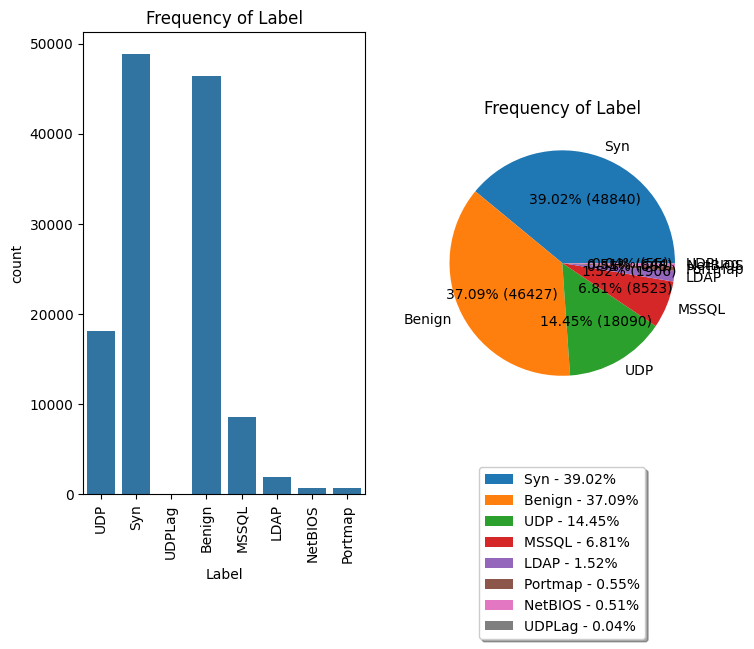

          Protocol      Ratio
Protocol                     
6            79530  63.537589
17           44814  35.802509
0              826   0.659903


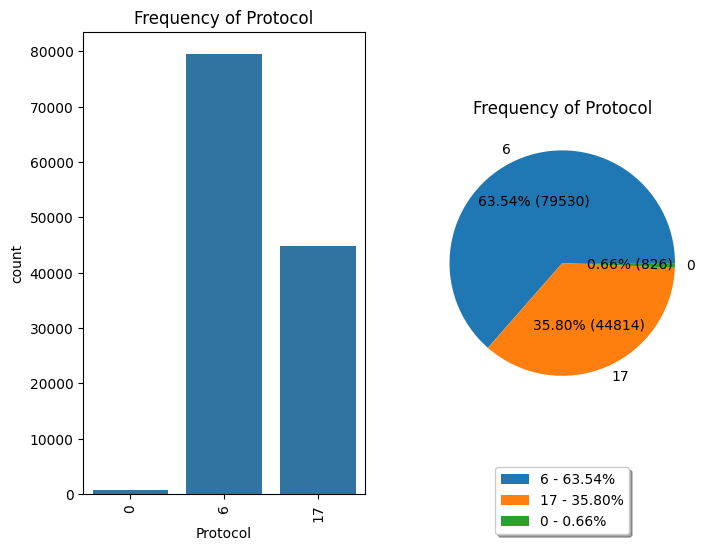

               Fwd PSH Flags     Ratio
Fwd PSH Flags                         
0                     118967  95.04434
1                       6203   4.95566


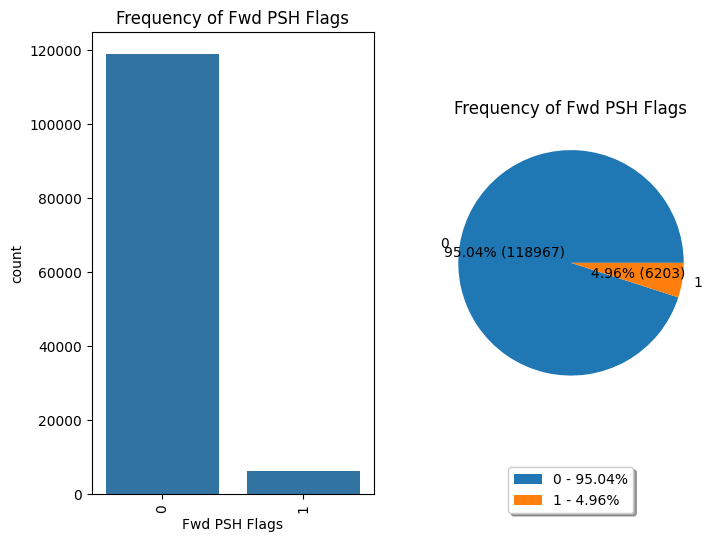

               Bwd PSH Flags  Ratio
Bwd PSH Flags                      
0                     125170  100.0


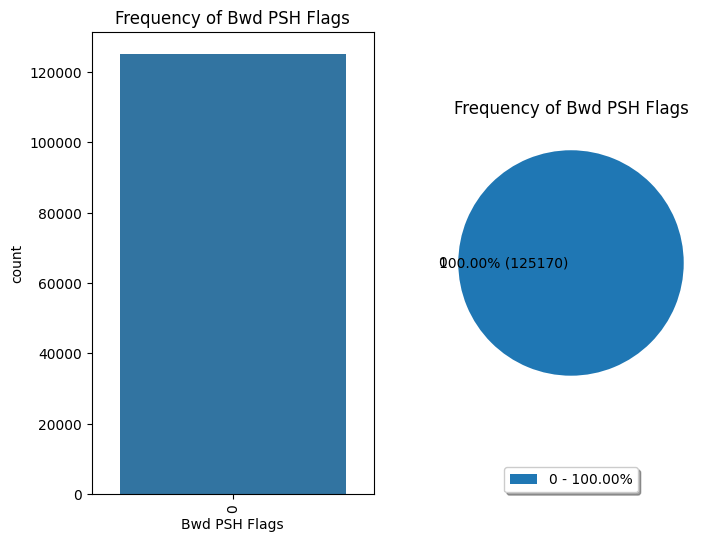

               Fwd URG Flags  Ratio
Fwd URG Flags                      
0                     125170  100.0


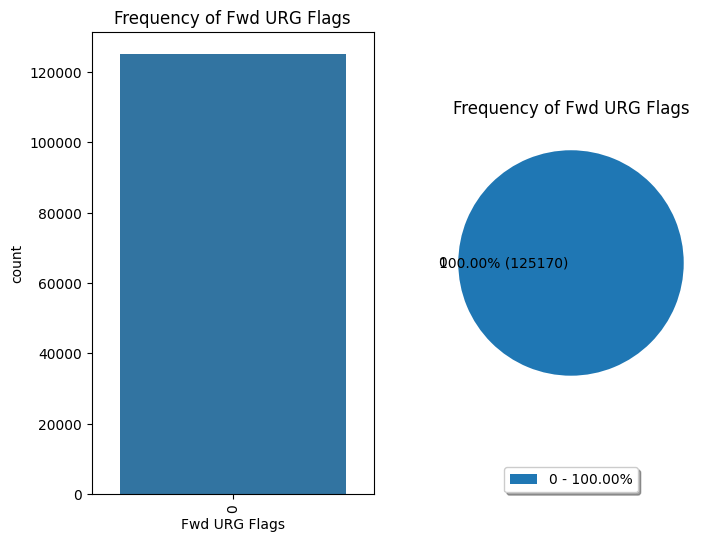

               Bwd URG Flags  Ratio
Bwd URG Flags                      
0                     125170  100.0


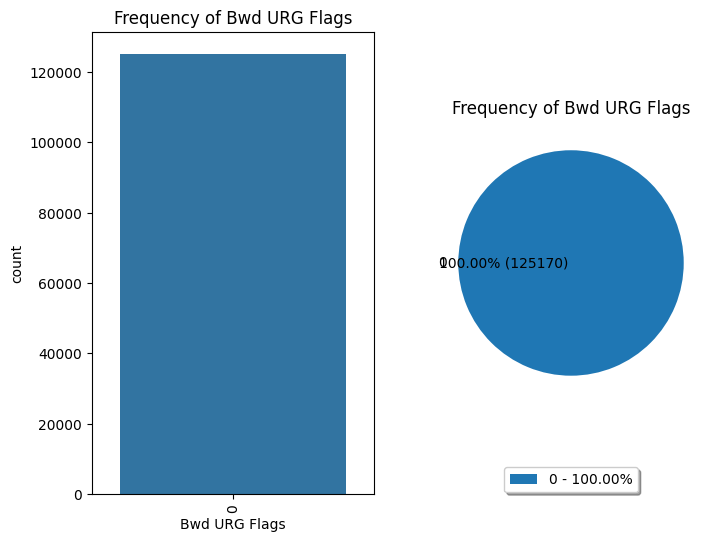

                FIN Flag Count  Ratio
FIN Flag Count                       
0                       125170  100.0


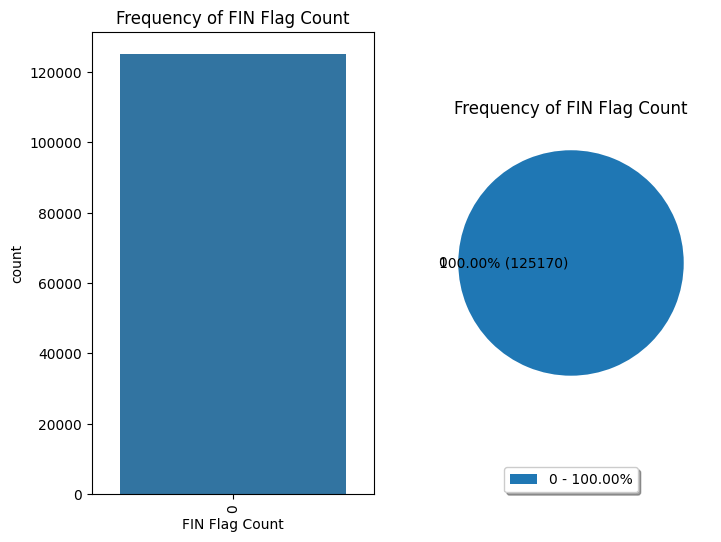

                SYN Flag Count      Ratio
SYN Flag Count                           
0                       125042  99.897739
1                          128   0.102261


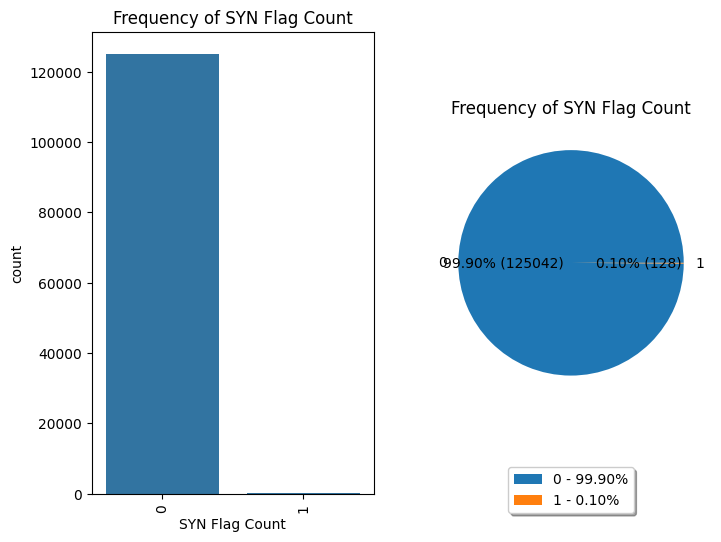

                RST Flag Count     Ratio
RST Flag Count                          
0                       118967  95.04434
1                         6203   4.95566


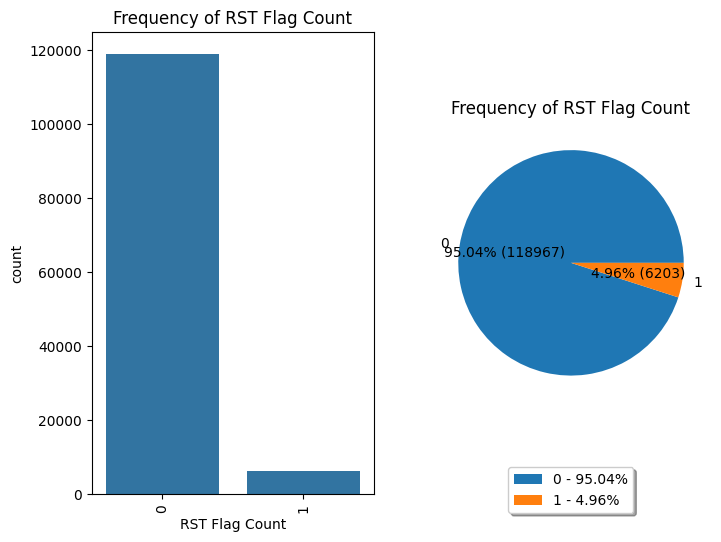

                PSH Flag Count  Ratio
PSH Flag Count                       
0                       125170  100.0


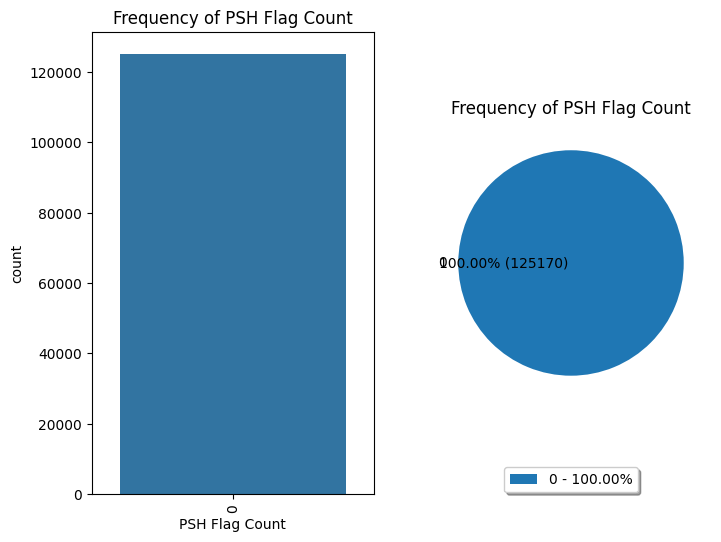

                ACK Flag Count      Ratio
ACK Flag Count                           
0                        66222  52.905648
1                        58948  47.094352


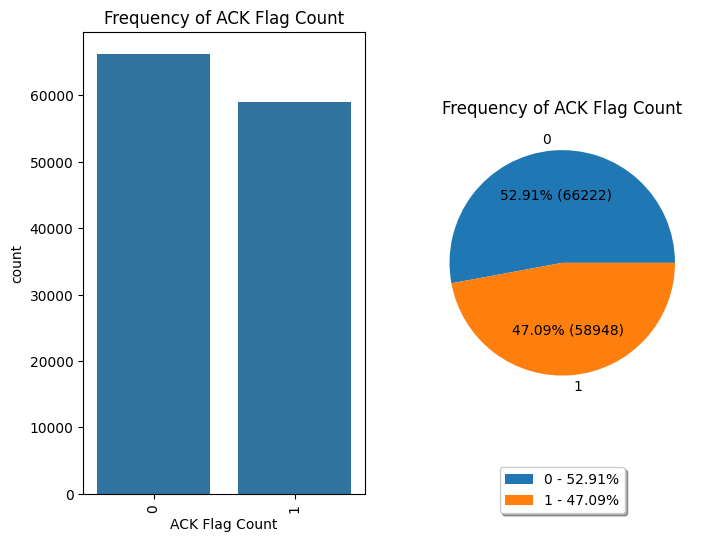

                URG Flag Count      Ratio
URG Flag Count                           
0                       104592  83.559958
1                        20578  16.440042


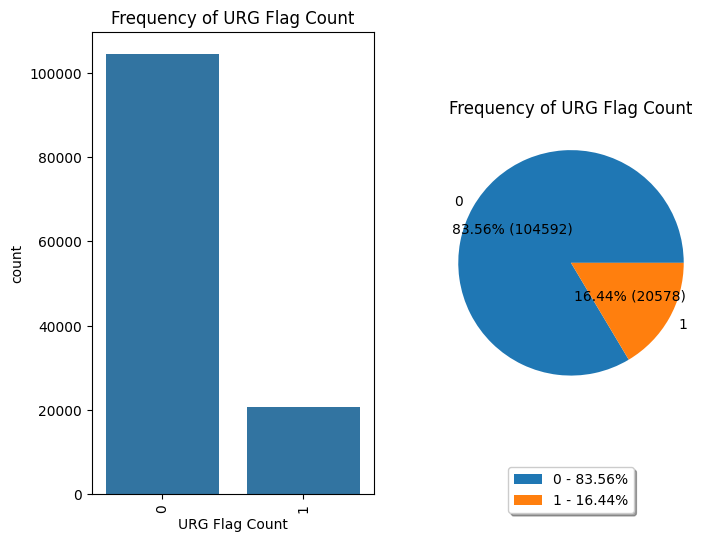

                CWE Flag Count      Ratio
CWE Flag Count                           
0                       114878  91.777582
1                        10292   8.222418


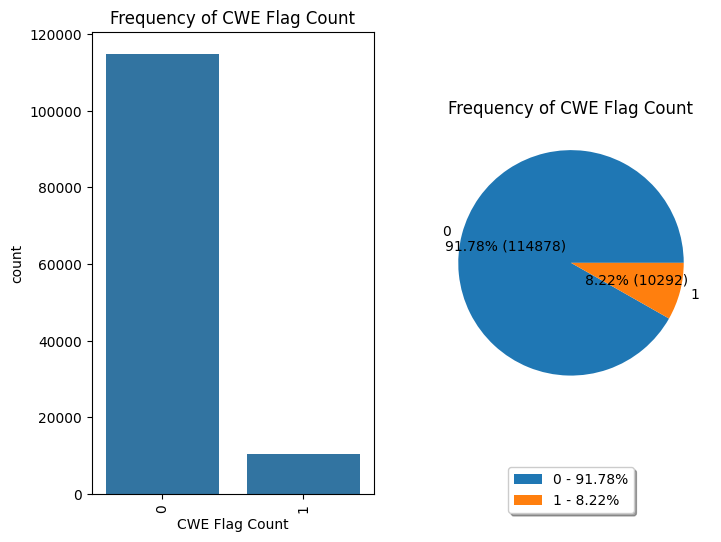

                ECE Flag Count  Ratio
ECE Flag Count                       
0                       125170  100.0


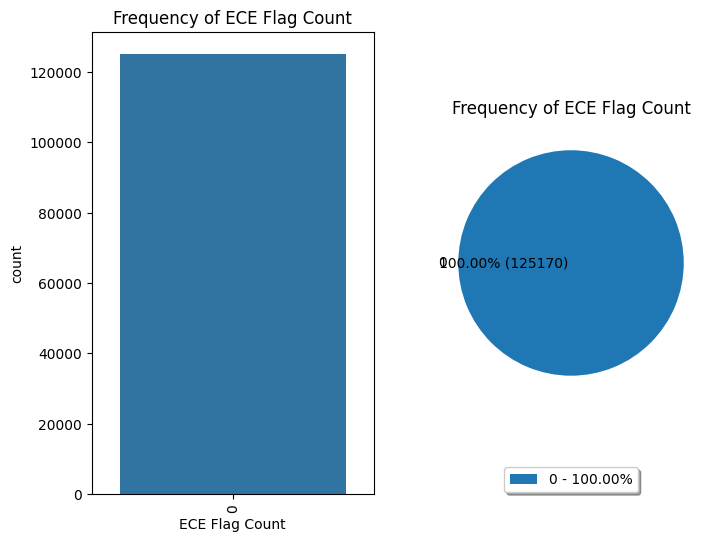

                    Fwd Avg Bytes/Bulk  Ratio
Fwd Avg Bytes/Bulk                           
0                               125170  100.0


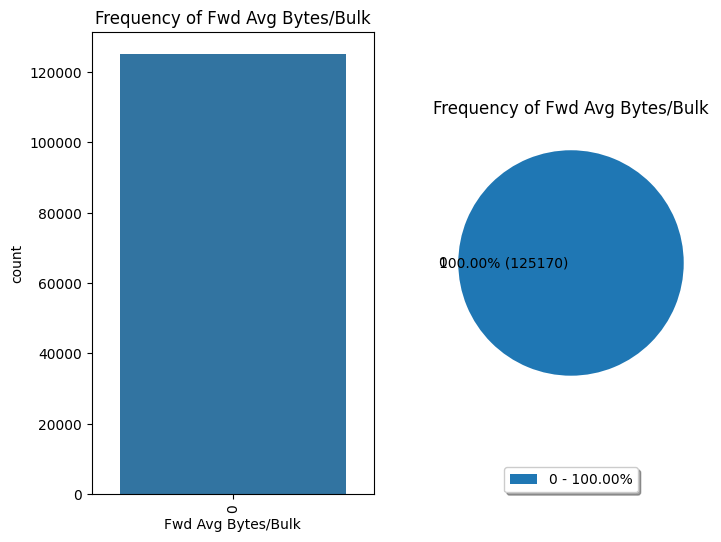

                      Fwd Avg Packets/Bulk  Ratio
Fwd Avg Packets/Bulk                             
0                                   125170  100.0


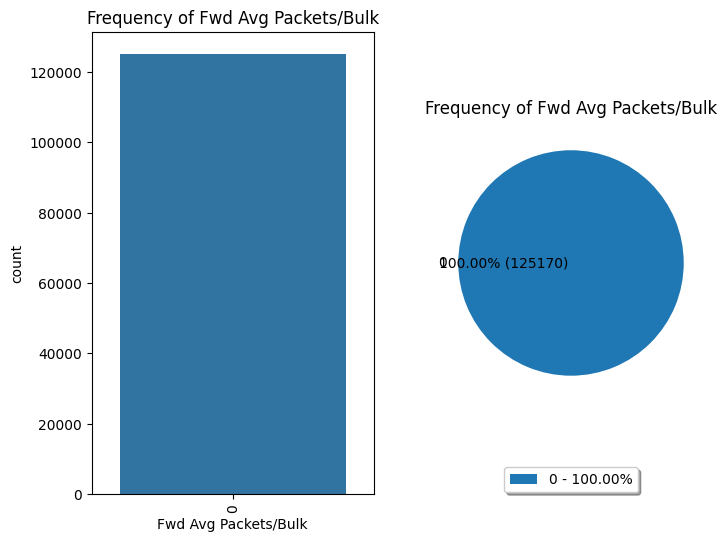

                   Fwd Avg Bulk Rate  Ratio
Fwd Avg Bulk Rate                          
0                             125170  100.0


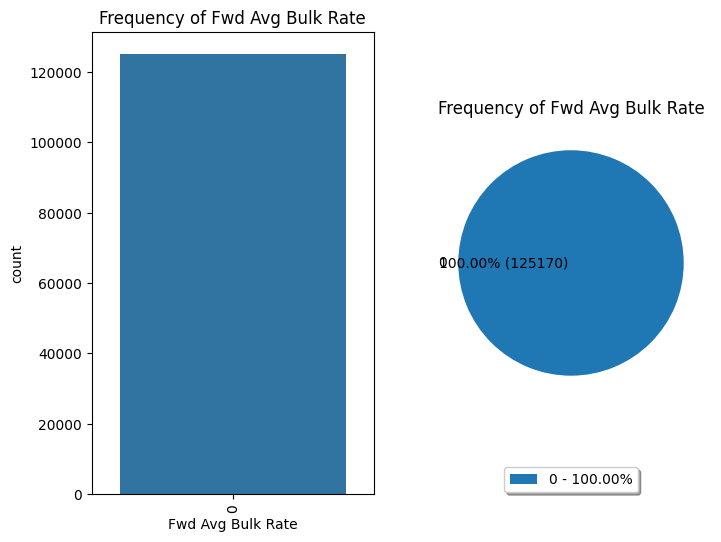

                    Bwd Avg Bytes/Bulk  Ratio
Bwd Avg Bytes/Bulk                           
0                               125170  100.0


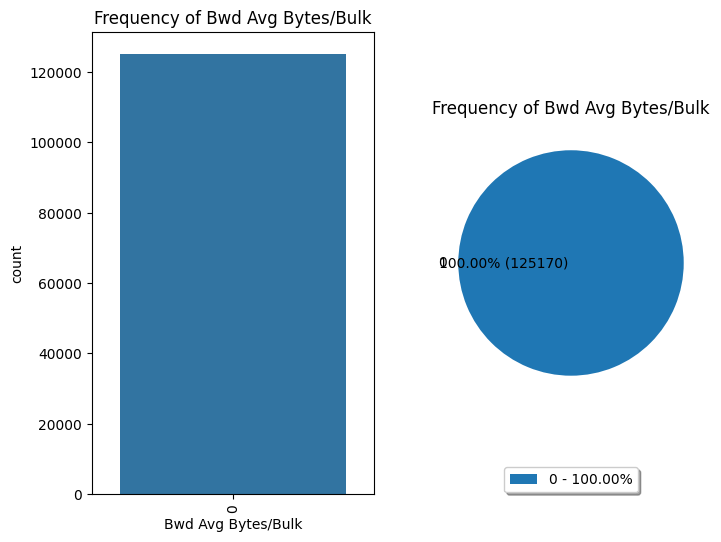

                      Bwd Avg Packets/Bulk  Ratio
Bwd Avg Packets/Bulk                             
0                                   125170  100.0


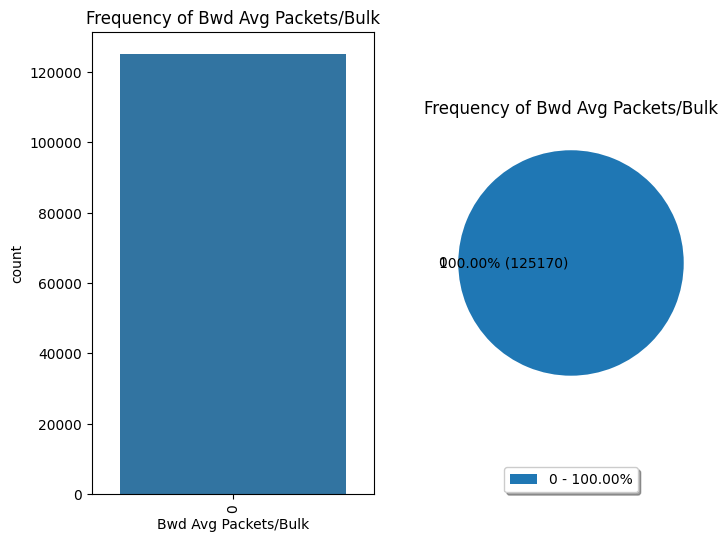

                   Bwd Avg Bulk Rate  Ratio
Bwd Avg Bulk Rate                          
0                             125170  100.0


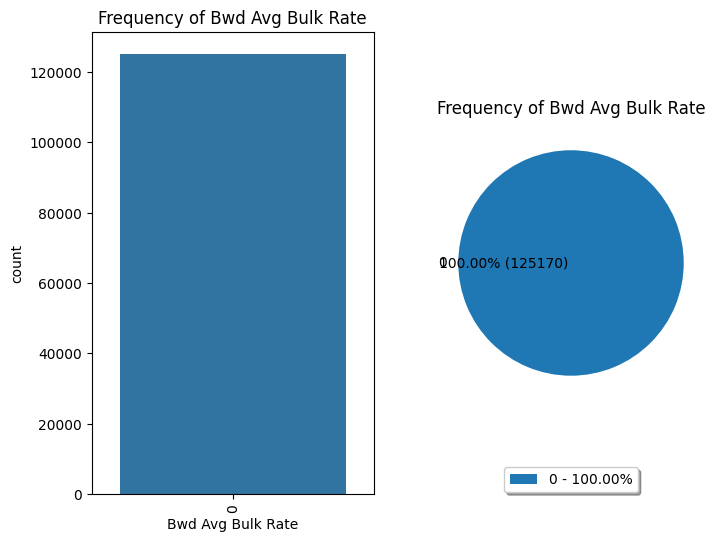

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(8, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(train_df, col, True)

These functions provide a flexible toolkit for visualizing different aspects of a dataset. You can create various types of plots (histograms, scatter plots, pie charts, etc.) and arrange them in a grid for better analysis. Each function takes a DataFrame and a column name (or other relevant parameters) to generate the desired plot.

In [66]:
def my_histplot(df, col, ax):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Histogram Plot of {col}')
def my_distplot(df, col, ax):
    sns.distplot(df[col], ax=ax)
    ax.set_title(f'Distribution Plot of {col}')
def my_kdeplot(df, col, ax):
    sns.kdeplot(df[col], ax=ax, fill=True)
    ax.set_title(f'KDE Plot of {col}')

# Relational Plots:
def my_scatterplot(df, col, ax):
    sns.scatterplot(df[col], ax=ax)
    ax.set_title(f'Scatter Plot of {col}')
def my_lineplot(df, col, ax):
    sns.lineplot(df[col], ax=ax)
    ax.set_title(f'Line Plot of {col}')

# Categorical Plots:
def my_pie_chart(df, col, ax):
    labels = df[col].value_counts()
    ax.pie(labels, labels=labels.index, autopct='%1.1f%%')
    ax.set_title(f'Pie Chart of {col}')
def my_countplot(df, col, ax):
    sns.countplot(x=df[col], ax=ax)
    ax.set_title(f'Count Plot of {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
def my_boxplot(df, col, ax):
    sns.boxplot(y=df[col], ax=ax)
def my_violinplot(df, col, ax):
    sns.violinplot(y=df[col], ax=ax)

# Matrix Plots:
def my_heatmap(df, size):
    if size: plt.figure(figsize=size)
    sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap='Blues', annot_kws={"size": 12})
    plt.title('Correlation Heatmap')
    plt.show()

#vsplot
def my_vsplot(df, normal_col, label_col):
    plt.figure(figsize=(10, 6), dpi=80)
    plt.bar(list(dict(df[normal_col].value_counts()).keys()), dict(df[normal_col].value_counts()).values(), color='r')
    plt.bar(list(dict(df[normal_col][df[label_col] == 1].value_counts()).keys()), dict(df[normal_col][df[label_col] == 1].value_counts()).values(), color='b')

    plt.xlabel(normal_col)
    plt.ylabel('Count')
    plt.legend(['All', label_col])
    # plt.title('The number of requests from different protocols')

def plot_charts_grid_single_feature(df, plot_func, size=(12, 4), n_col=1):
    if len(df.columns) == 0:
        return
    n_rows = (len(df.columns) + n_col-1) // n_col
    fig, axes = plt.subplots(n_rows, n_col, figsize=(size[0]*n_col, size[1]*n_rows))
    if len(df.columns) == 1:
        axes = np.array([axes])
    axes = axes.flatten()

    for i, label in enumerate(df.columns):
        plot_func(df, label, axes[i])
        axes[i].set_xlabel(label)

    for j in range(i+1, n_rows*n_col):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

The line of code calls the plot_charts_grid_single_feature function to create a grid of distribution plots for all numeric columns in the train_df DataFrame.

<ipython-input-66-9eead46061cd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax)
<ipython-input-66-9eead46061cd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax)
<ipython-input-66-9eead46061cd>:5: UserWarning: 

`distplot` is a deprecated function and will be remo

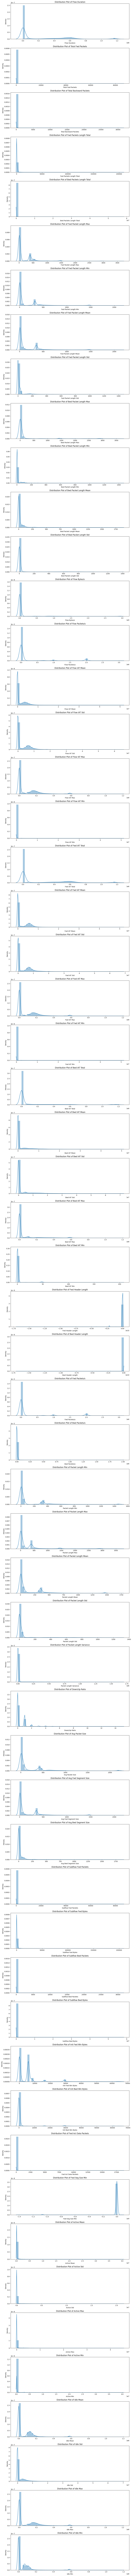

In [67]:
plot_charts_grid_single_feature(train_df[num_cols], my_distplot)

The function plot_charts_grid_single_feature is called with two arguments: train_df[num_cols]: This passes a DataFrame containing only the numeric columns (as defined in the num_cols variable) from the train_df. my_distplot: This is the plotting function that will be applied to each column in the DataFrame.

The function call plot_charts_grid_single_feature(train_df[num_cols], my_boxplot, size=(2, 4), n_col=6) will generate a grid of box plots for each numeric feature in the train_df DataFrame.

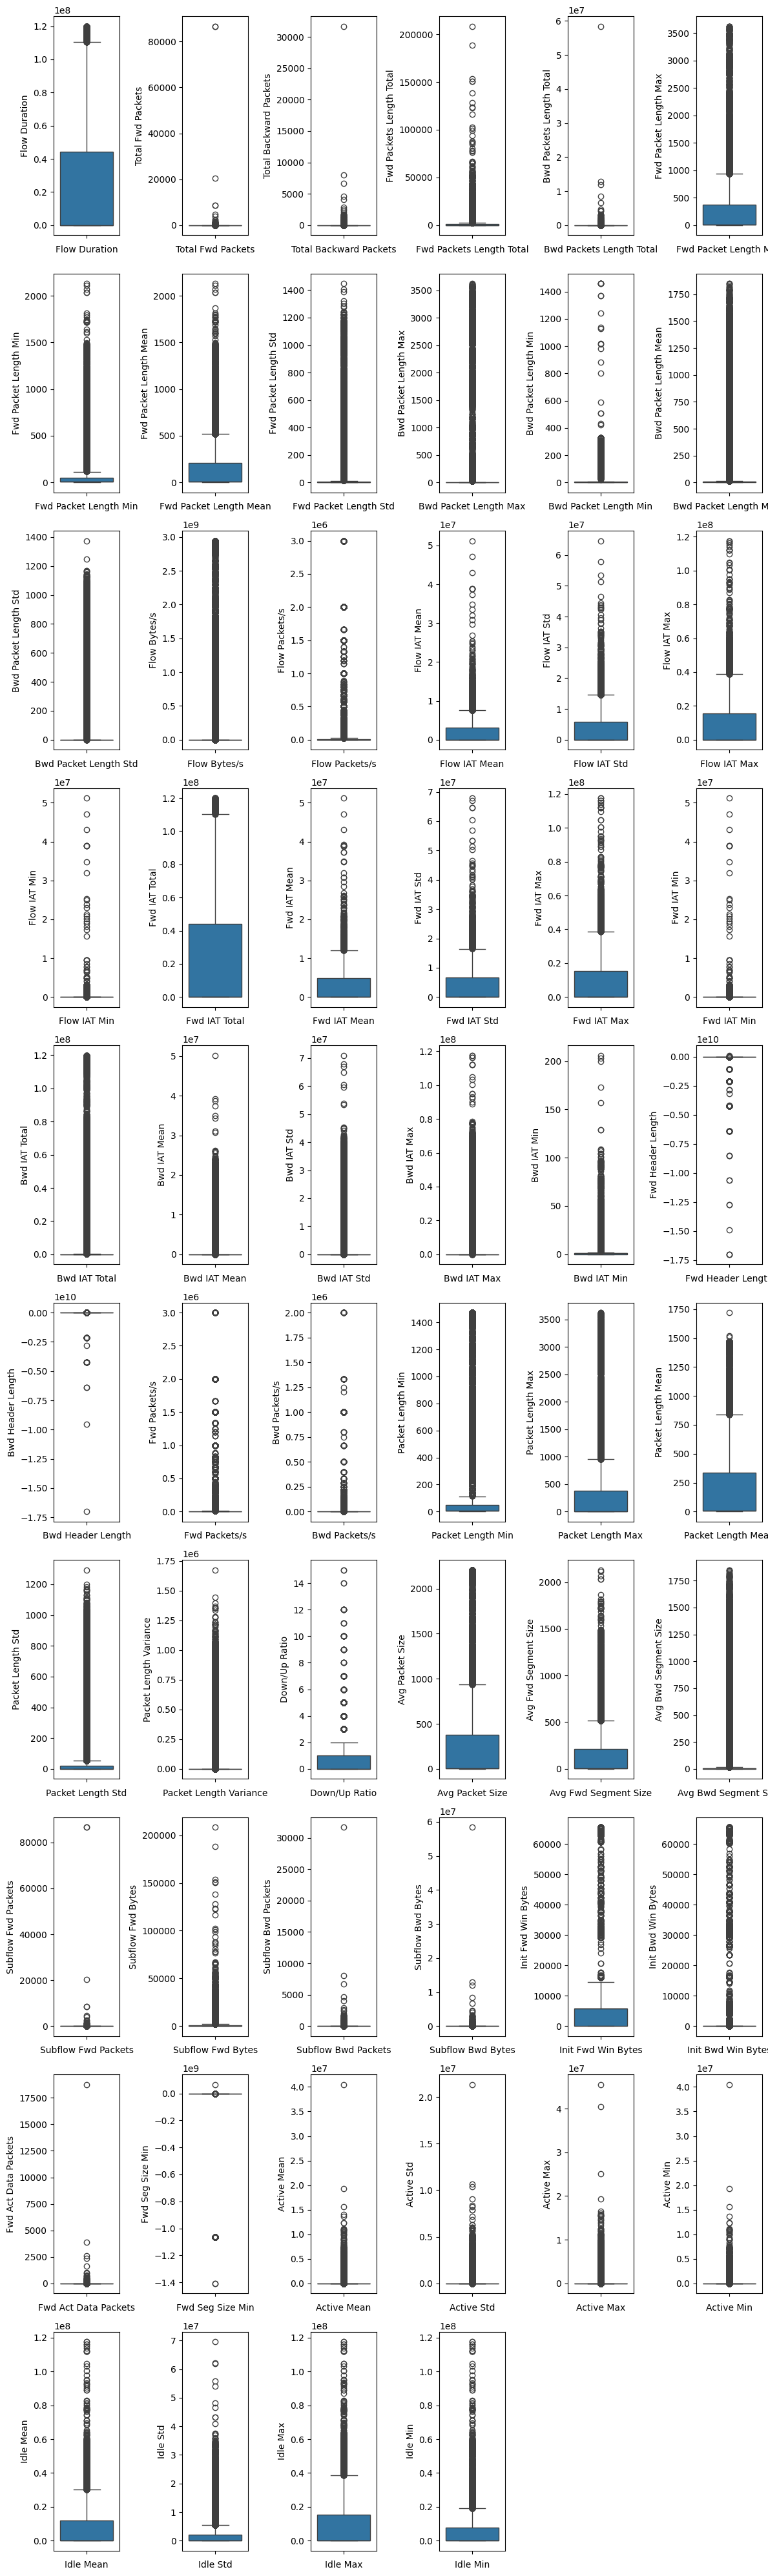

In [68]:

plot_charts_grid_single_feature(train_df[num_cols], my_boxplot, size=(2, 4), n_col=6)

Box Plot of Flow Duration by Label This plot shows the distribution of flow durations for different traffic labels (e.g., DDoS attacks vs. normal traffic). Axes: X-axis: Represents the different traffic labels (e.g., 'Benign', 'MSSQL', etc.). Y-axis: Represents the 'Flow Duration' feature, which indicates the duration of each flow.

Box Plot of Packet Length Mean by Protocol and Label This plot visualizes the mean packet length categorized by different protocols, further segmented by the traffic label. Axes: X-axis: Represents different protocols (e.g., TCP, UDP). Y-axis: Represents the 'Packet Length Mean', which indicates the average length of packets for each flow. Hue: The hue parameter differentiates between attack labels (e.g., normal vs. various attack types) within each protocol.

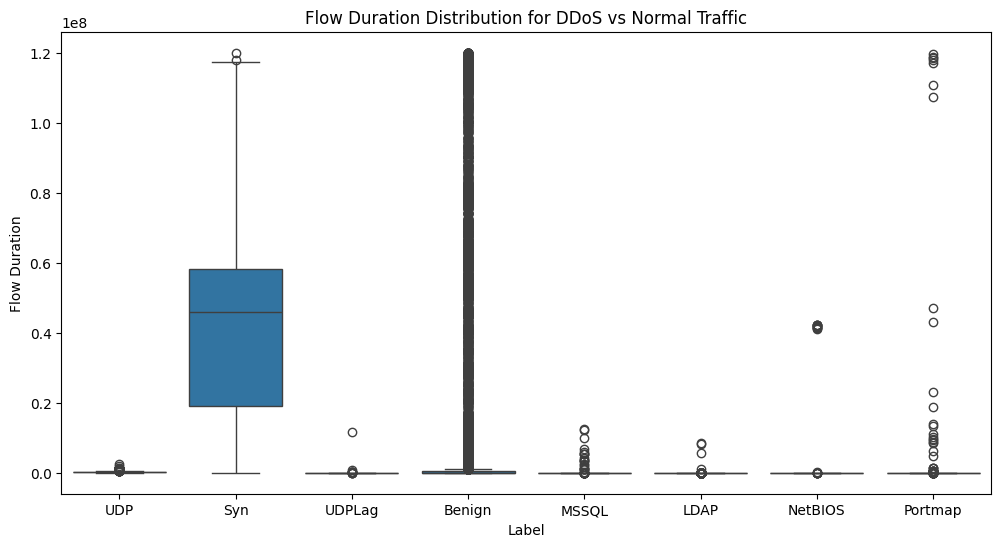

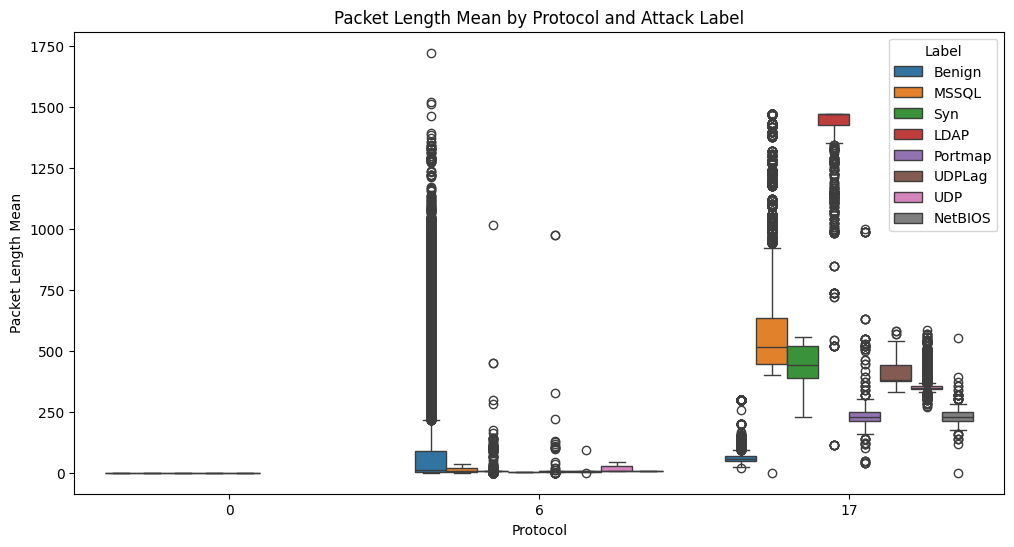

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Label', y='Flow Duration', data=train_df)
plt.title('Flow Duration Distribution for DDoS vs Normal Traffic')
plt.show()

# Boxplot of Packet Length Mean by Protocol and Label
plt.figure(figsize=(12, 6))
sns.boxplot(x='Protocol', y='Packet Length Mean', hue='Label', data=train_df)
plt.title('Packet Length Mean by Protocol and Attack Label')
plt.show()

Flag Columns:

flag_columns: This list contains the names of specific columns related to TCP flags, which are commonly used in network traffic analysis: SYN Flag Count: Number of SYN (synchronize) flags in the packet. ACK Flag Count: Number of ACK (acknowledgment) flags in the packet. FIN Flag Count: Number of FIN (finish) flags in the packet. RST Flag Count: Number of RST (reset) flags in the packet.

This code snippet creates a bar chart that visualizes the number of requests associated with different network protocols in your dataset. plt.figure(figsize=(10, 6), dpi=80)

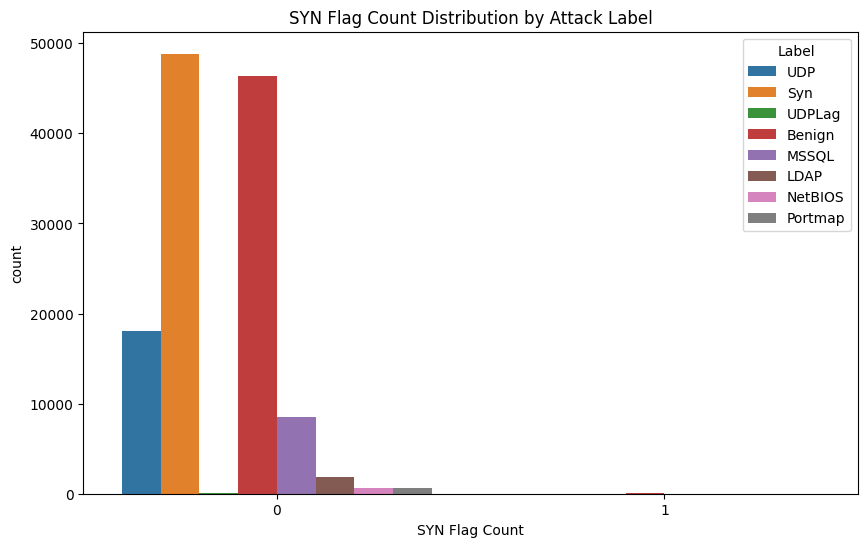

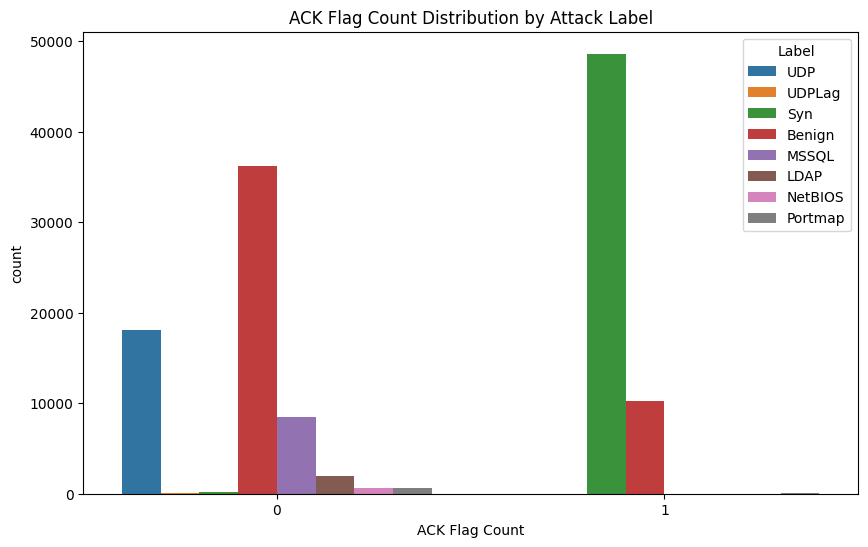

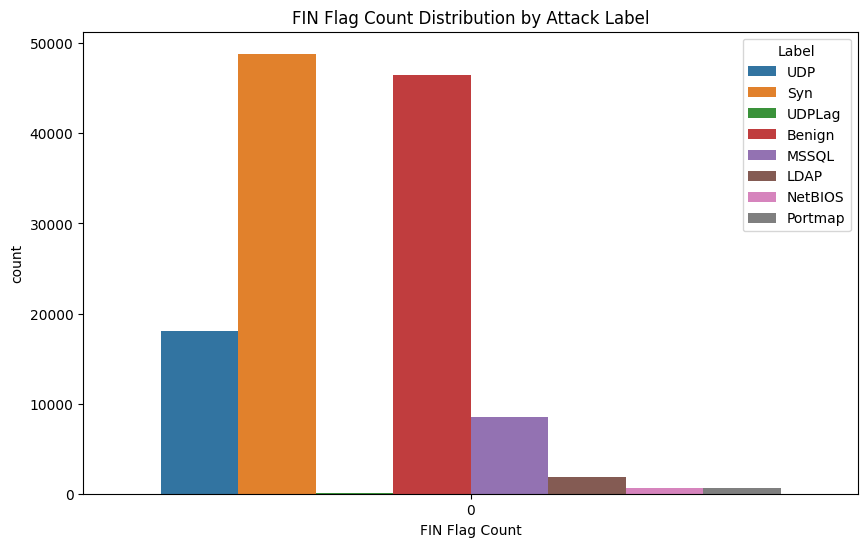

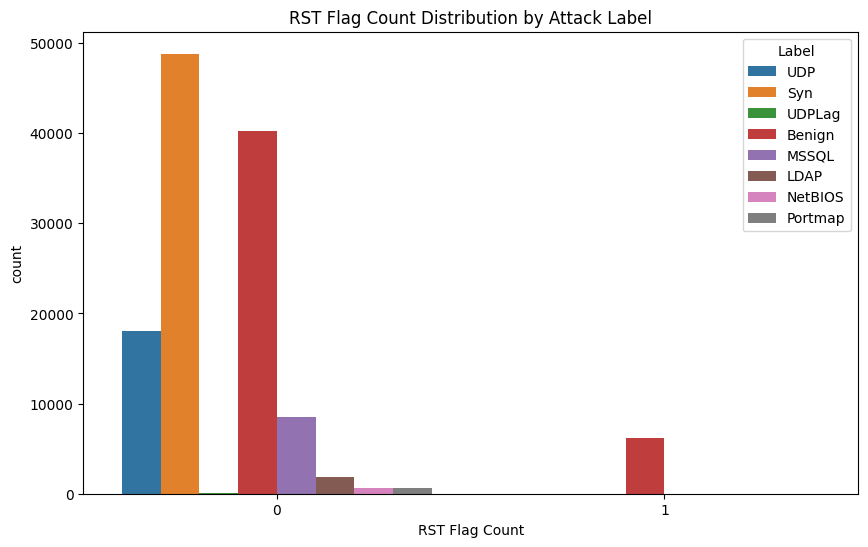

In [70]:
flag_columns = ['SYN Flag Count', 'ACK Flag Count', 'FIN Flag Count', 'RST Flag Count']

for flag in flag_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=flag, hue='Label', data=train_df)
    plt.title(f'{flag} Distribution by Attack Label')
    plt.show()


Text(0.5, 1.0, 'The number of requests from different protocols')

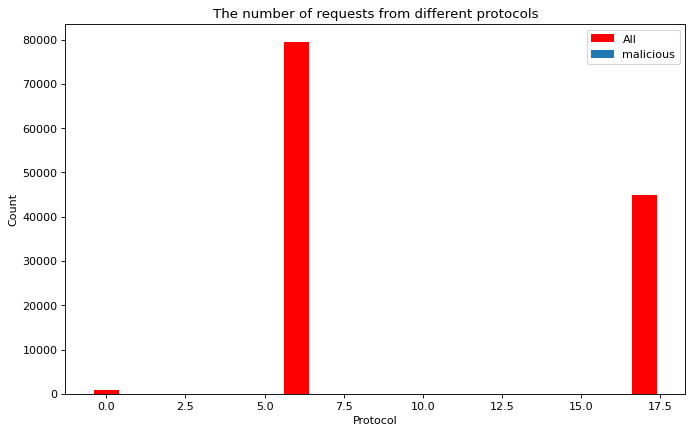

In [71]:
plt.figure(figsize=(10, 6), dpi=80)
plt.bar(list(dict(train_df.Protocol.value_counts()).keys()), dict(train_df.Protocol.value_counts()).values(), color='r')
plt.bar(list(dict(train_df[train_df.Label == 1].Protocol.value_counts()).keys()), dict(train_df[train_df.Label == 1].Protocol.value_counts()).values(), color='b')

plt.xlabel('Protocol')
plt.ylabel('Count')
plt.legend(['All', 'malicious'])
plt.title('The number of requests from different protocols')

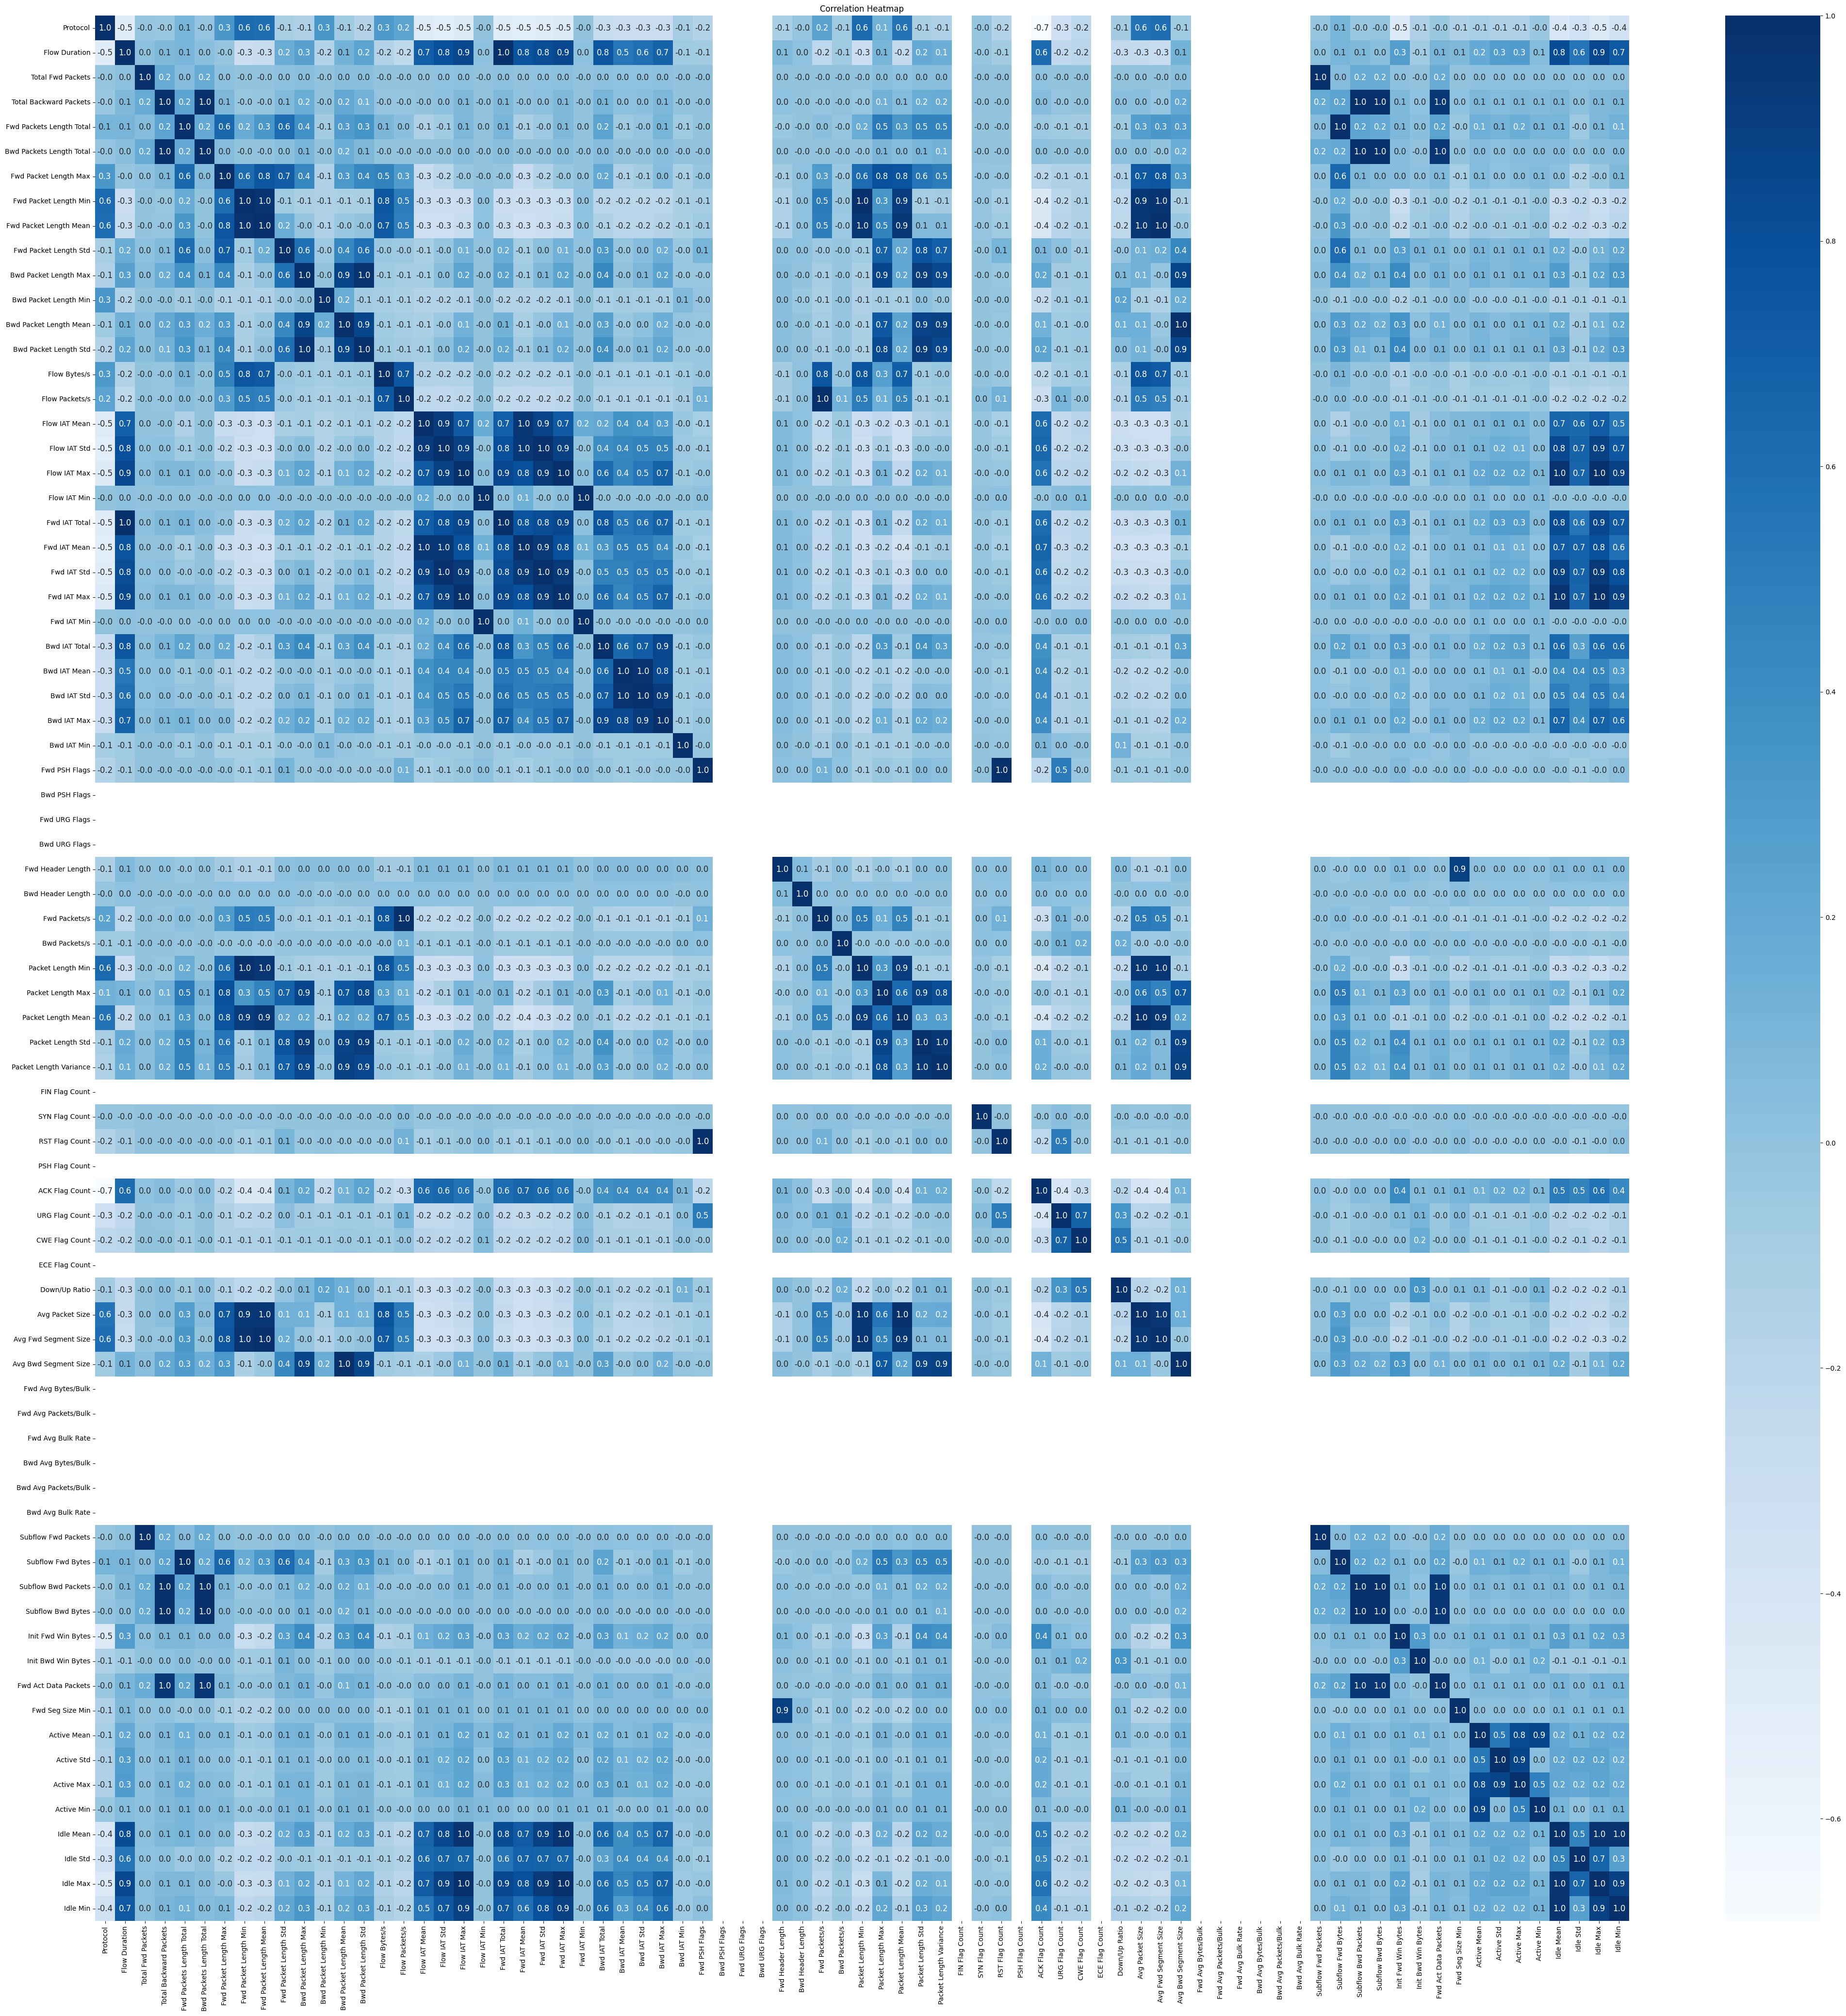

In [72]:
import numpy as np
n_numeric_cols = len(train_df.select_dtypes(include=[np.number]).columns) // 3 * 2
my_heatmap(train_df.select_dtypes(include=[np.number]), size=(n_numeric_cols+1, n_numeric_cols+1))

In [73]:
remove_cols = ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count', 'Fwd Avg Bytes/Bulk',
'Fwd Avg Packets/Bulk',
'Fwd Avg Bulk Rate',
'Bwd Avg Bytes/Bulk',
'Bwd Avg Packets/Bulk',
'Bwd Avg Bulk Rate', 'ECE Flag Count', 'PSH Flag Count']

In [74]:
train_df.drop(remove_cols, axis=1, inplace=True)

In [75]:
# Select only numerical columns
numerical_df = train_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr().abs()

# Generate a boolean mask for the upper triangle
mask = np.triu(np.ones(corr_matrix.shape), k=1) == 1

# Select the upper triangle of the correlation matrix
upper_tri = corr_matrix.where(mask)

# Find the columns with a high correlation of 0.8 or higher
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

# Drop the columns with a high correlation
numerical_df.drop(to_drop, axis=1, inplace=True)

In [76]:
to_drop

['Bwd Packets Length Total',
 'Fwd Packet Length Mean',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow IAT Std',
 'Flow IAT Max',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Fwd Packets/s',
 'Packet Length Min',
 'Packet Length Max',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'RST Flag Count',
 'Avg Packet Size',
 'Avg Fwd Segment Size',
 'Avg Bwd Segment Size',
 'Subflow Fwd Packets',
 'Subflow Fwd Bytes',
 'Subflow Bwd Packets',
 'Subflow Bwd Bytes',
 'Fwd Act Data Packets',
 'Fwd Seg Size Min',
 'Active Max',
 'Active Min',
 'Idle Mean',
 'Idle Max',
 'Idle Min']

In [77]:
remove_col1 = ['Bwd Packets Length Total',
 'Fwd Packet Length Mean',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow IAT Std',
 'Flow IAT Max',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Fwd Packets/s',
 'Packet Length Min',
 'Packet Length Max',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'RST Flag Count',
 'Avg Packet Size',
 'Avg Fwd Segment Size',
 'Avg Bwd Segment Size',
 'Subflow Fwd Packets',
 'Subflow Fwd Bytes',
 'Subflow Bwd Packets',
 'Subflow Bwd Bytes',
 'Fwd Act Data Packets',
 'Fwd Seg Size Min',
 'Active Max',
 'Active Min',
 'Idle Mean',
 'Idle Max',
 'Idle Min']

In [78]:
train_df.drop(remove_col1, axis=1, inplace=True)

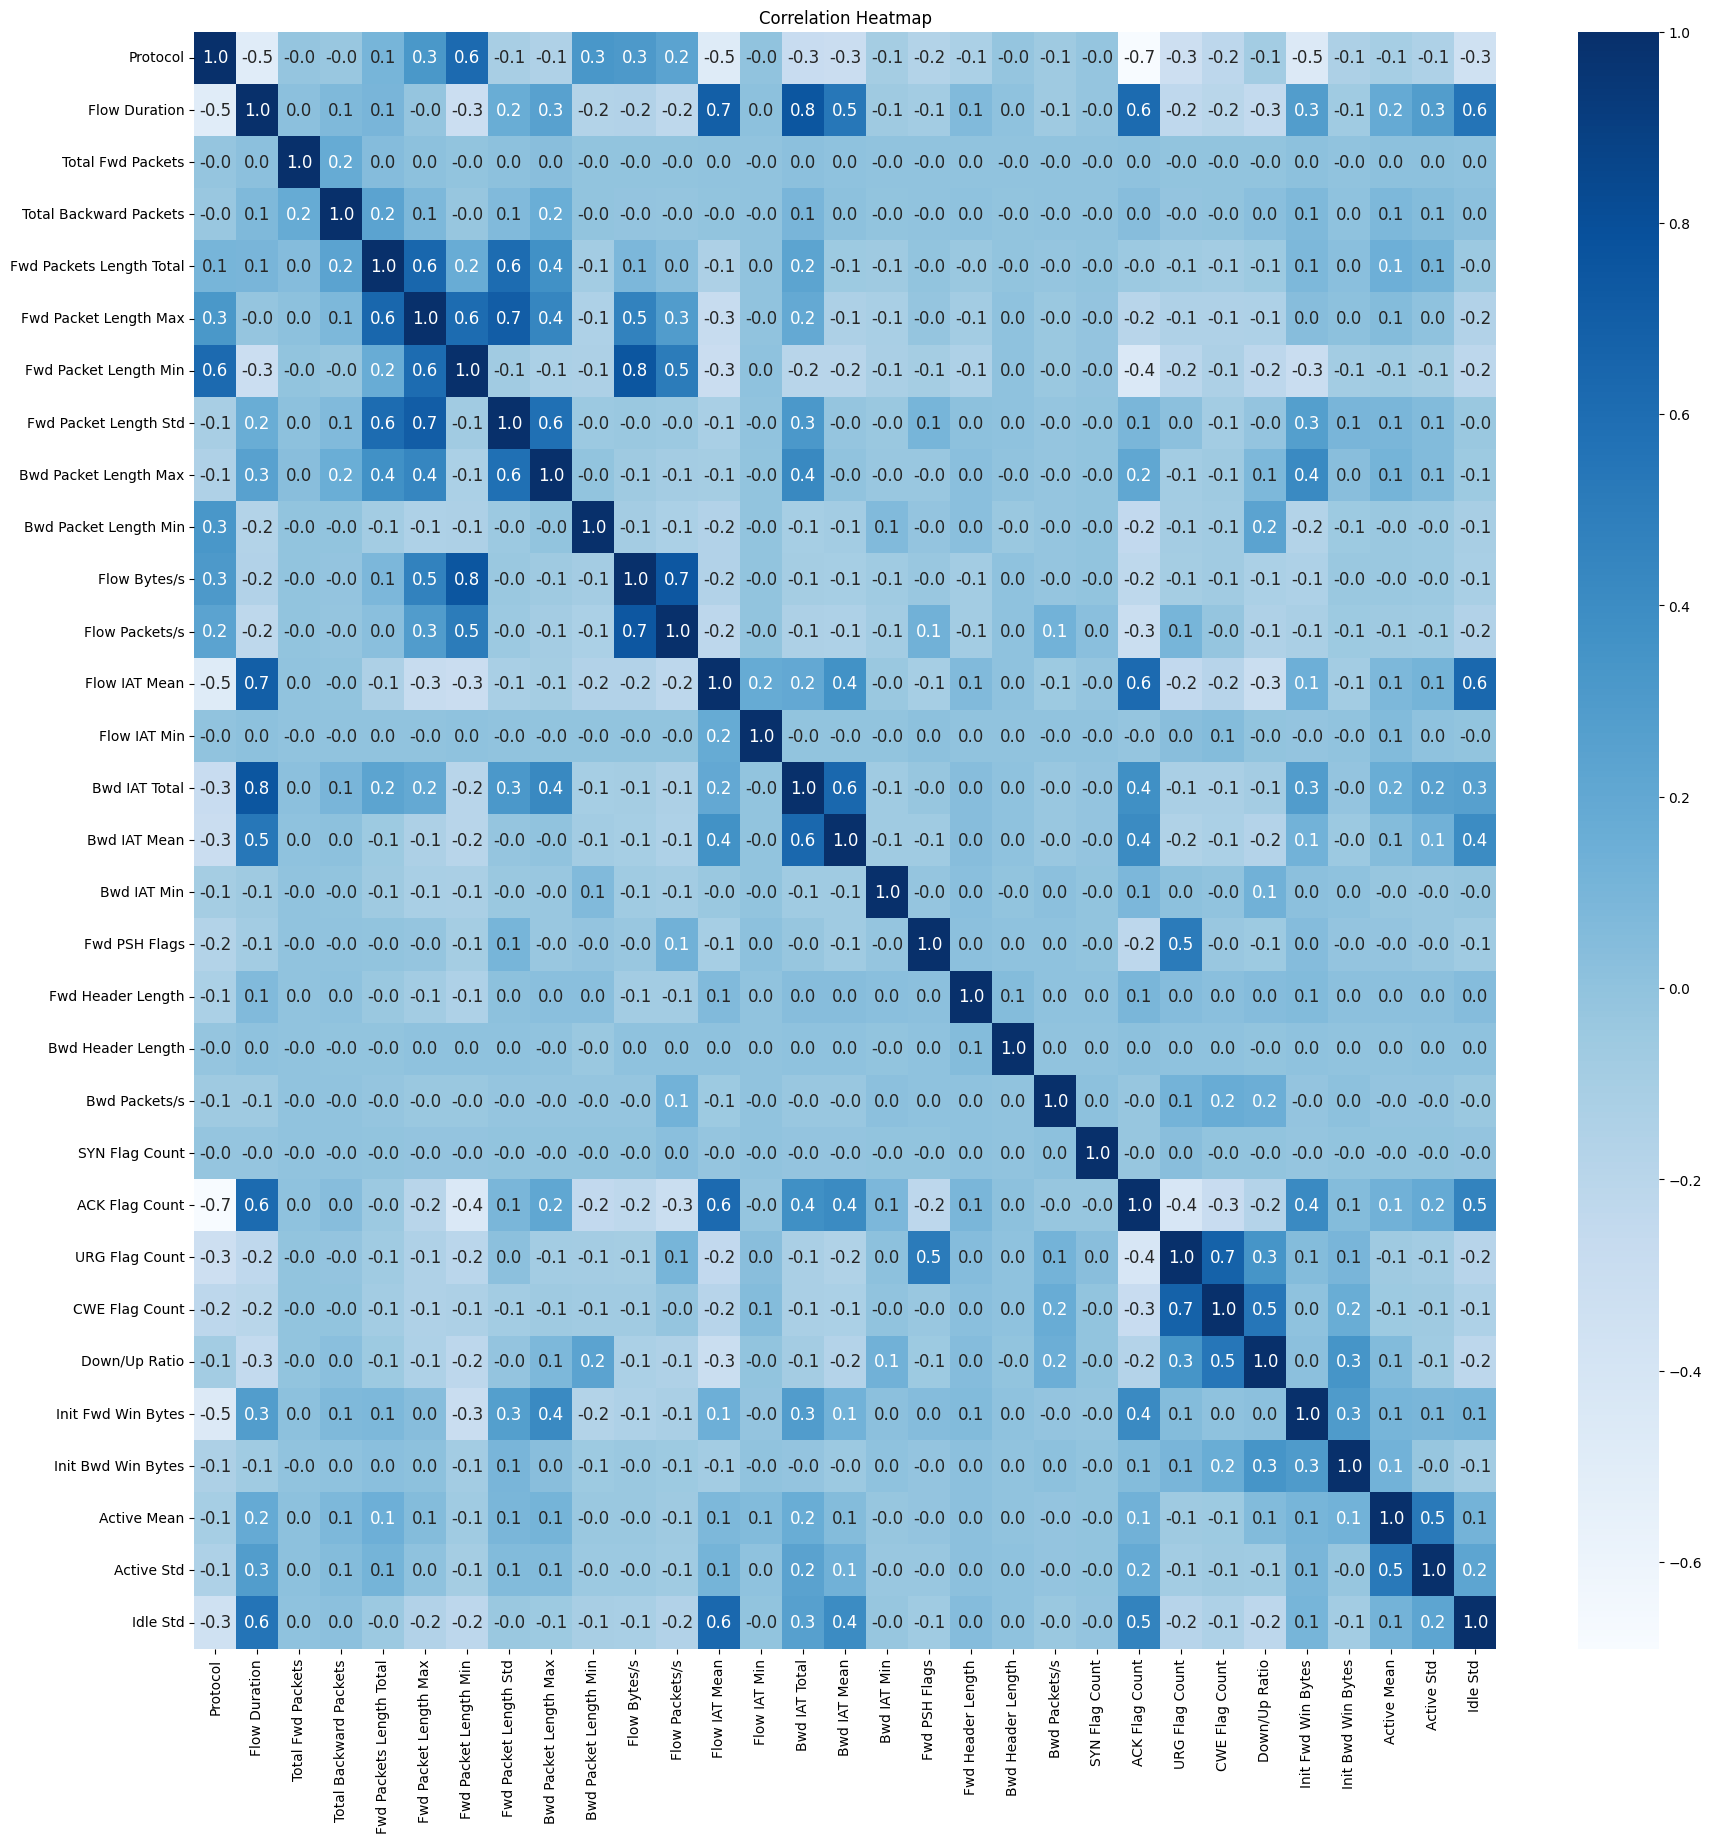

In [79]:
n_numeric_cols = len(train_df.select_dtypes(include=[np.number]).columns) // 3 * 2
my_heatmap(train_df.select_dtypes(include=[np.number]), size=(n_numeric_cols+1, n_numeric_cols+1))

In [80]:
train_df.head()

Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0        17              2                  2                       0   
1         6       40833176                 10                       4   
2         6              1                  2                       0   
3         6            103                  2                       2   
4         6             41                  2                       2   

   Fwd Packets Length Total  Fwd Packet Length Max  Fwd Packet Length Min  \
0                     802.0                  401.0                  401.0   
1                      60.0                    6.0                    6.0   
2                      12.0                    6.0                    6.0   
3                      12.0                    6.0                    6.0   
4                      12.0                    6.0                    6.0   

   Fwd Packet Length Std  Bwd Packet Length Max  Bwd Packet Length Min  ...  \
0                    0.0                    0.0                    0.0  ...   
1                    0.0                    6.0                    6.0  ...   
2                    0.0                    0.0                    0.0  ...   
3                    0.0                    6.0                    6.0  ...   
4                    0.0                    6.0                    6.0  ...   

   ACK Flag Count  URG Flag Count  CWE Flag Count  Down/Up Ratio  \
0               0               0               0            0.0   
1               1               0               0            0.0   
2               1               0               0            0.0   
3               1               0               0            1.0   
4               1               0               0            1.0   

   Init Fwd Win Bytes  Init Bwd Win Bytes    Active Mean    Active Std  \
0                  -1                  -1       0.000000       0.00000   
1                5840                   0  101847.335938  176403.03125   
2                5840                  -1       0.000000       0.00000   
3                5840                   0       0.000000       0.00000   
4                5840                   0       0.000000       0.00000   

     Idle Std  Label  
0        0.00    UDP  
1  2733040.25    Syn  
2        0.00    Syn  
3        0.00    Syn  
4        0.00    Syn  

[5 rows x 32 columns]

In [81]:
train_df['Label'].unique()

array(['UDP', 'Syn', 'UDPLag', 'Benign', 'MSSQL', 'LDAP', 'NetBIOS',
       'Portmap'], dtype=object)

In [82]:
train_df = pd.get_dummies(train_df, columns=['Label'], prefix='Label')

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



In [84]:
train_df.columns

Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Bwd Packets/s', 'SYN Flag Count',
       'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'Down/Up Ratio',
       'Init Fwd Win Bytes', 'Init Bwd Win Bytes', 'Active Mean', 'Active Std',
       'Idle Std', 'Label_Benign', 'Label_LDAP', 'Label_MSSQL',
       'Label_NetBIOS', 'Label_Portmap', 'Label_Syn', 'Label_UDP',
       'Label_UDPLag'],
      dtype='object')

In [85]:
features = [
    'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Fwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Min',
    'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min',
    'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Min',
    'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Min', 'Fwd PSH Flags',
    'Fwd Header Length', 'Bwd Header Length', 'Bwd Packets/s', 'SYN Flag Count',
    'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'Down/Up Ratio',
    'Init Fwd Win Bytes', 'Init Bwd Win Bytes', 'Active Mean', 'Active Std',
    'Idle Std'
]

# Labels (assuming one-hot encoding for labels)
labels = [
    'Label_Benign', 'Label_LDAP', 'Label_MSSQL', 'Label_NetBIOS',
    'Label_Portmap', 'Label_Syn', 'Label_UDP', 'Label_UDPLag'
]

In [86]:
X = train_df[features]
y = train_df[labels].values  # Assuming your labels are in a one-hot encoded format

y_single_label = np.argmax(y, axis=1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_single_label, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
# 1. Passive Aggressive Classifier
pac = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
pac.fit(X_train, y_train)
pac_predictions = pac.predict(X_test)
print("Passive Aggressive Classifier Accuracy:", accuracy_score(y_test, pac_predictions))
print("Classification Report:\n", classification_report(y_test, pac_predictions))

Passive Aggressive Classifier Accuracy: 0.9564592154669649
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      9218
           1       0.00      0.00      0.00       376
           2       0.72      0.97      0.83      1724
           3       0.00      0.00      0.00       132
           4       0.43      0.46      0.44       125
           5       0.97      0.99      0.98      9879
           6       1.00      0.91      0.95      3570
           7       0.00      0.00      0.00        10

    accuracy                           0.96     25034
   macro avg       0.51      0.54      0.52     25034
weighted avg       0.94      0.96      0.95     25034



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


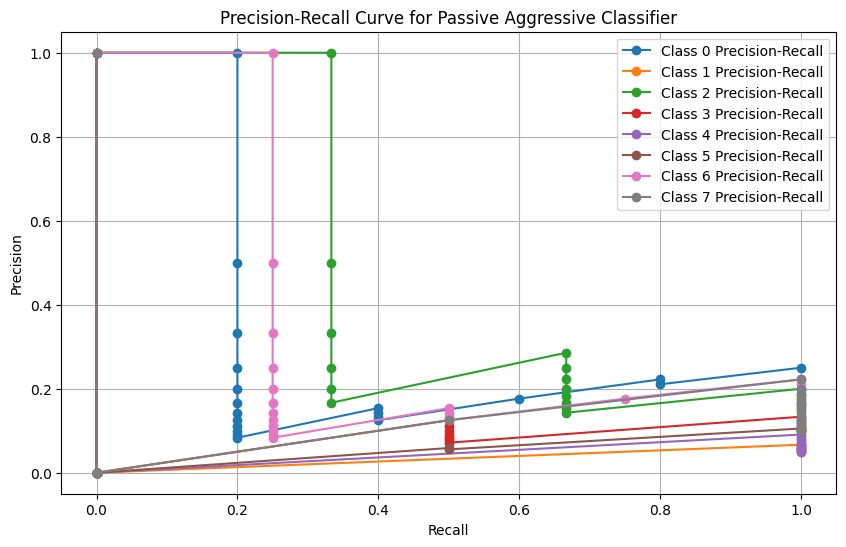

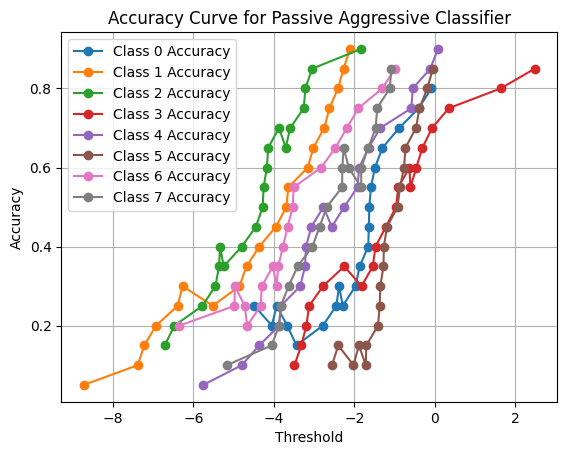

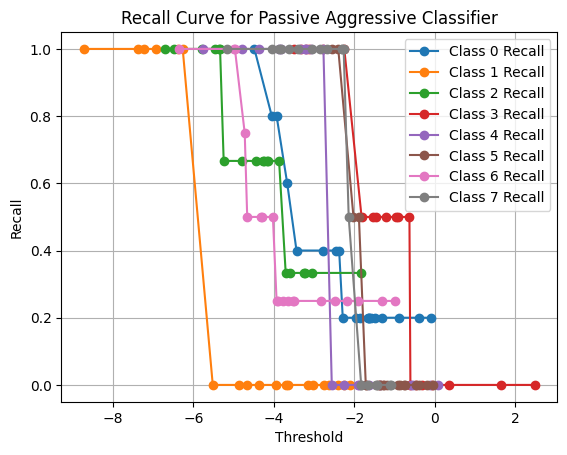

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve
from sklearn.preprocessing import label_binarize

# Sample data (replace this with your actual dataset)
# X: feature data, y: target labels
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.randint(0, 8, 100)  # 100 samples, 8 classes (0-7)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Passive Aggressive Classifier
pac = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
pac.fit(X_train, y_train)

# Binarize y_test for multi-class precision-recall curve calculation (One-vs-Rest)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7])

# Get decision function scores for all classes
pac_probabilities = pac.decision_function(X_test)

# 1. Precision-Recall Curve for each class
n_classes = y_test_binarized.shape[1]
plt.figure(figsize=(10, 6))

for i in range(n_classes):
    precision, recall, thresholds = precision_recall_curve(y_test_binarized[:, i], pac_probabilities[:, i])
    plt.plot(recall, precision, marker='o', label=f'Class {i} Precision-Recall')

# Plot Precision-Recall Curve
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Passive Aggressive Classifier')
plt.legend()
plt.grid()
plt.show()

# 2. Accuracy Curve (for each class)
for i in range(n_classes):
    precision, recall, thresholds = precision_recall_curve(y_test_binarized[:, i], pac_probabilities[:, i])
    accuracy = []
    for threshold in thresholds:
        preds = (pac_probabilities[:, i] >= threshold).astype(int)
        acc = accuracy_score(y_test_binarized[:, i], preds)
        accuracy.append(acc)

    plt.plot(thresholds, accuracy, marker='o', label=f'Class {i} Accuracy')

# Plot Accuracy Curve
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve for Passive Aggressive Classifier')
plt.legend()
plt.grid()
plt.show()

# 3. Recall Curve (for each class)
for i in range(n_classes):
    precision, recall, thresholds = precision_recall_curve(y_test_binarized[:, i], pac_probabilities[:, i])
    plt.plot(thresholds, recall[:-1], marker='o', label=f'Class {i} Recall')

plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall Curve for Passive Aggressive Classifier')
plt.legend()
plt.grid()
plt.show()


In [89]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
rfc_predictions = rfc.predict(X_test)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, rfc_predictions))
print("Classification Report:\n", classification_report(y_test, rfc_predictions))

Random Forest Classifier Accuracy: 0.1
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.50      0.25      0.33         4
           7       1.00      0.50      0.67         2

    accuracy                           0.10        20
   macro avg       0.19      0.09      0.12        20
weighted avg       0.20      0.10      0.13        20



In [90]:
# 3. Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
dtc_predictions = dtc.predict(X_test)
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, dtc_predictions))
print("Classification Report:\n", classification_report(y_test, dtc_predictions))

Decision Tree Classifier Accuracy: 0.05
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       1.00      0.25      0.40         4
           7       0.00      0.00      0.00         2

    accuracy                           0.05        20
   macro avg       0.12      0.03      0.05        20
weighted avg       0.20      0.05      0.08        20

